In [8]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from ext.utils import is_non_dominated
from ext.plot_figs import get_default_fig
from ext.lbd import cpt_lbd_correl, cpt_lb_ind

In [9]:
K, d = 5, 2
𝝻  = arms_means = np.array([[ 0.72875559,  1.20119222],
                            [0.45524805, -0.63317069],
                            [0.62826926,  1.27683777],
                            [0.94570734,  2.31592981],
                            [ 2.08131887,  1.4809387 ]])
ps_mask = is_non_dominated(arms_means)
arms = np.arange(K)
ps = arms[ps_mask]
non_ps = arms[~ps_mask]

##### Compute the characteristic time $T^*[\theta, \rho]$

In [10]:
nval = 10
rho = np.linspace(-3+1e-4, 1-1e-5, nval)
niter = 500
def wrp_rho(k, niter):
    Z = np.ones((d, d)) *(1+rho[k])/2
    np.fill_diagonal(Z, np.ones(d))
    return (cpt_lbd_correl(𝝻, Z, niter=niter)[1], k)
res_rho = Parallel(n_jobs=-1, verbose=1)(delayed(wrp_rho)(k, niter) for k in range(nval))
res_rho = np.array(sorted(res_rho, key=lambda x: x[-1]))
T_ref  = cpt_lbd_correl(𝝻, np.diag(np.ones(d)), niter=niter)[1]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.6s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished


<Figure size 640x480 with 0 Axes>

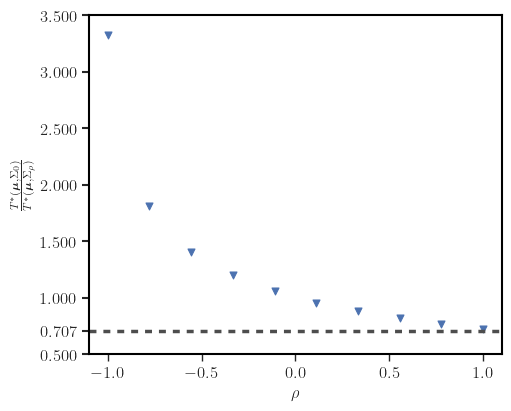

In [11]:
fig = get_default_fig()
plt.scatter((1+rho)/2, T_ref/res_rho[:,0], marker="v")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\frac{T^*(\boldsymbol{\mu}, \Sigma_0)}{T^*(\boldsymbol{\mu}, \Sigma_\rho)}$");
eps = -0.02
plt.axhline(min(T_ref/res_rho[:,0])+eps, color=".3", dashes=(2, 2))
plt.yticks(list(plt.yticks()[0]) + [eps + min(T_ref/res_rho[:,0])])
fig.savefig("T_rho.pdf", transparent=True, dpi=2000,
                edgecolor='black', backend="pgf", format="pdf")

In [12]:
list(zip((1+rho)/2, T_ref/res_rho[:,0]))

[(-0.9999499999999999, 3.3255850551674078),
 (-0.7777338888888887, 1.808065388333969),
 (-0.5555177777777778, 1.408274175572226),
 (-0.3333016666666666, 1.198206159853685),
 (-0.11108555555555555, 1.057042373150299),
 (0.11113055555555551, 0.957287277856945),
 (0.3333466666666667, 0.8797808981394729),
 (0.5555627777777776, 0.8174752623917693),
 (0.7777788888888888, 0.7681669130783287),
 (0.999995, 0.7274333345854871)]